In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# View all of the classes that automap found
#1) measurement and 2)station
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [51]:
# Display columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24cba7c8a30>,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [52]:
# Display columns and data in dictionary format  
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24cb5cebc40>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()
    



[('2017-08-23',)]

Text(0, 0.5, 'Precipitation in Inches')

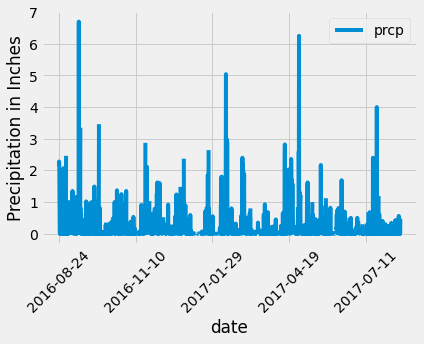

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.datetime(2017, 8, 23)- dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(result, columns=['date','prcp'])

prcp_df = prcp_df.set_index('date')

prcp_df= prcp_df.sort_values(by='date',ascending = True)

prcp_df.plot(rot=45)
plt.ylabel("Precipitation in Inches")

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()



,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number stations in the dataset

# Display columns and data in dictionary format

print("Total number stations in the dataset")
station_count = session.query(func.count(Station.station)).all()


station_count

Total number stations in the dataset


[(9,)]

In [57]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

print("Station Observations Highest to Lowest")
session.query(Measurement.station, 
   func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()





Station Observations Highest to Lowest


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

print("Lowest Temp")
session.query(Measurement.date, func.min(Measurement.tobs)).filter(Measurement.date >= start_date, Measurement.station =='USC00519281').all()



Lowest Temp


[('2017-02-02', 59.0)]

In [60]:
print("Highest Temp")
session.query(Measurement.date, func.max(Measurement.tobs)).filter(Measurement.date >= start_date, Measurement.station =='USC00519281').all()


Highest Temp


[('2017-08-06', 83.0)]

In [62]:

print("Average Temp")
session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start_date, Measurement.station =='USC00519281').all()


Average Temp


[(73.0968660968661,)]

Text(0.5, 1.0, 'Station: USC00519281')

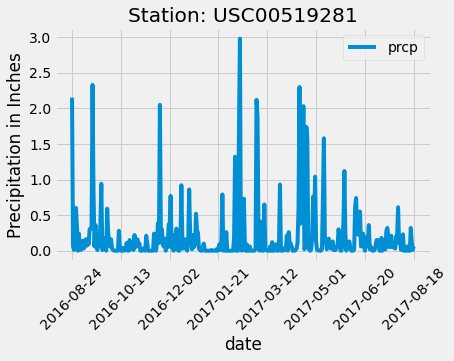

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.station =='USC00519281').all()
   
prcp_df = pd.DataFrame(result, columns=['date','prcp'])

prcp_df = prcp_df.set_index('date')

prcp_df= prcp_df.sort_values(by='date',ascending = True)

prcp_df.plot(rot=45)
plt.ylabel("Precipitation in Inches")
plt.title("Station: USC00519281")

# Close session

In [42]:
# Close Session
session.close()